## Libraries:

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import seaborn as sns
import random

## Monte Carlo Simulation:
The Monte Carlo Simulation is a computational technique that relies on repeated random sampling to solve mathematical problems, particularly those involving a significant degree of uncertainty.

### Pi Calculation:
1. **Random sampling**: Randomly generate points within a square.
2. **Calculations**: Count the number of points that fall inside a circle inscribed in the square (all points with a distance less than or equal to the circle's radius from the center are considered inside).
3. **Statistical analysis**: The ratio of points inside the circle to the total number of points generated approximates Pi. As the number of points increases, the estimate becomes more accurate.

$$
\frac{S_{circle}}{S_{square}} = \frac{\pi r^{2}}{4r^{2}} = \frac{\pi }{4} \Rightarrow
$$

$$
\frac{\pi }{4} = \frac{no.\: of \: points \: generated \: inside \: the \: circle}{total \: points} \Rightarrow 
$$

$$
\pi = 4 \times \frac{no.\: of \: points \: generated \: inside \: the \: circle}{total \: points}
$$

In [3]:
def find_pi_list(total_points):
    circle_points = 0
    pi_estimates = [0] * (total_points)
    points = np.random.uniform(-1, 1, size=(total_points, 2))
    distances = np.linalg.norm(points, axis=1)
    for i, distance in enumerate(distances):
        if distance <= 1:
            circle_points += 1
        pi_estimates[i] = 4 * (circle_points / (i+1))
    return pi_estimates

def find_pi(total_points):
    points = np.random.uniform(-1, 1, size=(total_points, 2))
    distances = np.linalg.norm(points, axis=1)
    circle_points = np.sum(distances <= 1)
    pi_estimate = 4 * (circle_points / total_points)
    return pi_estimate

True pi: 3.141592653589793
Estimate of pi: 3.14172


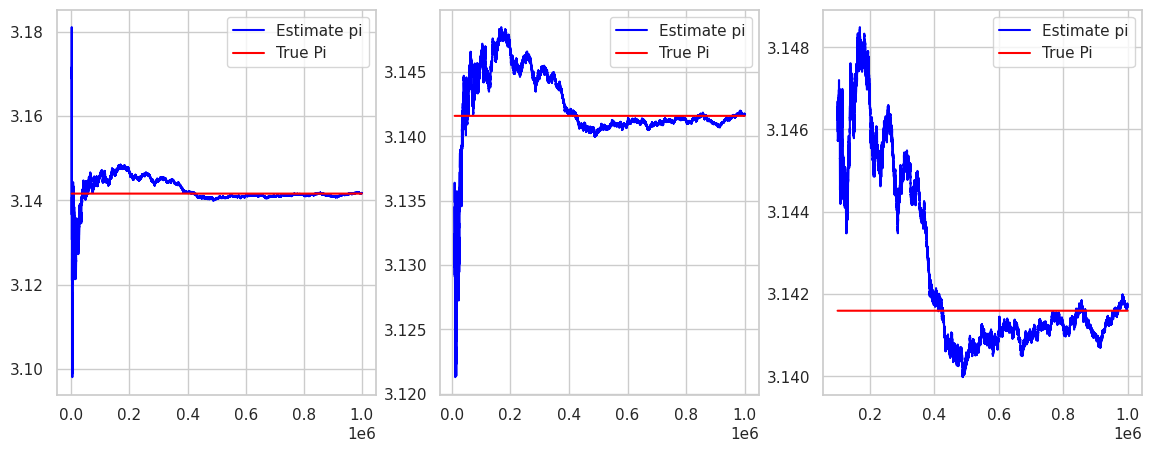

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 5))

total_points = 1000000
start_points = [1000, 10000, 100000]  

true_pi = np.pi * np.ones(total_points - np.min(start_points))
estimation_of_pi = find_pi_list(total_points)
print("True pi:", np.pi)
print("Estimate of pi:", estimation_of_pi[-1])

for i, start_point in enumerate(start_points):
    plt.subplot(1, 3, i + 1)
    x_axis = np.arange(start_point, total_points, 1)
    y_estimate = estimation_of_pi[start_point:]
    y_true = true_pi[:total_points - start_point]

    plt.plot(x_axis, y_estimate, color="blue", label="Estimate pi")
    plt.plot(x_axis, y_true, color="red", label="True Pi")
    plt.legend()

plt.show()


In [227]:
total_points = 1000000
num_of_simulation = 60

estimate_pi = np.zeros(num_of_simulation)
for i in range(num_of_simulation):
    estimate_pi[i] = find_pi(total_points)

print("True pi:", np.pi)
print("Estimate of pi:", np.mean(estimate_pi))

True pi: 3.141592653589793
Estimate of pi: 3.1415737999999993


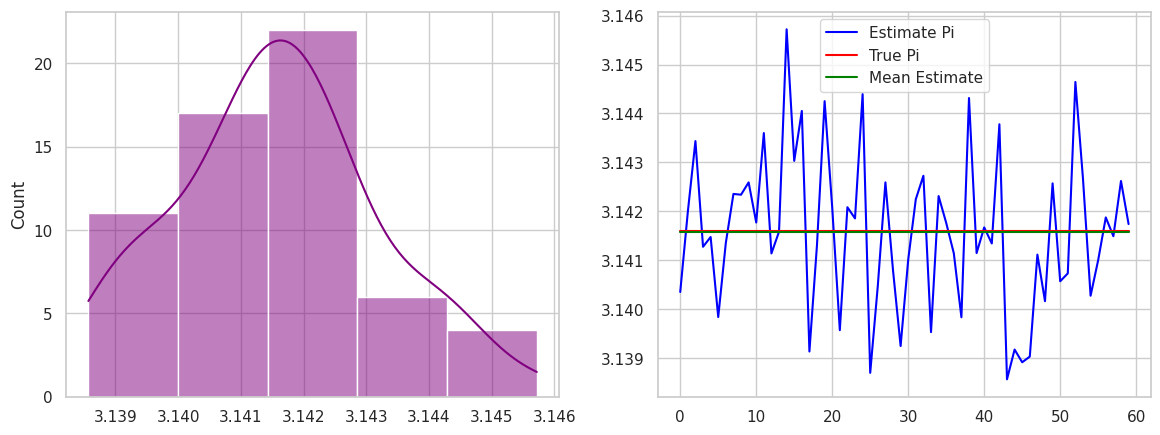

In [245]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(estimate_pi, bins=5, kde=True, color= "purple")

plt.subplot(1, 2, 2)
true_pi = np.pi * np.ones(num_of_simulation)
mean_pi = np.mean(estimate_pi) * np.ones(num_of_simulation)

plt.plot(np.arange(num_of_simulation), estimate_pi, color="blue", label="Estimate Pi")
plt.plot(np.arange(num_of_simulation), true_pi, color="red", label="True Pi")
plt.plot(np.arange(num_of_simulation), mean_pi, color="green", label="Mean Estimate")
plt.legend()
plt.show()

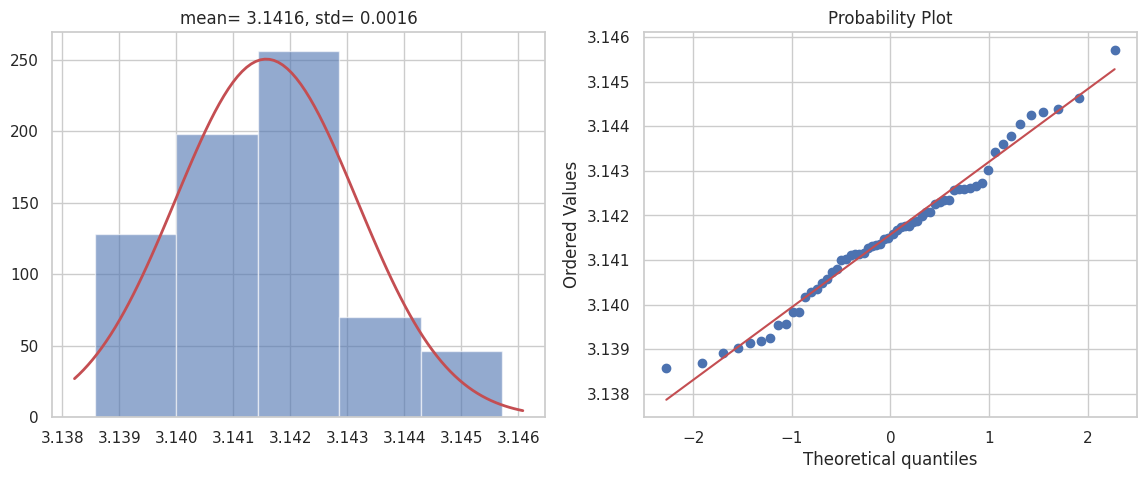

In [235]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.set_theme(style="whitegrid")
plt.hist(estimate_pi, bins=5, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
mu, std = stats.norm.fit(estimate_pi)
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title(f"mean= {mu:.4f}, std= {std:.4f}")

plt.subplot(1, 2, 2)
stats.probplot(estimate_pi, dist="norm", plot=plt)
plt.show()


### Mensch Game:
To perform a Monte Carlo simulation for the game of Mensch, we need to simulate the game many times and calculate the outcomes. Since the game is purely based on chance, the outcome of each roll of the dice will determine the movement of the pieces. The goal is to find the probability of each player winning.

1. **Game Initialization**: Begin by setting up the game, positioning each player at their starting point.
2. **Dice Roll**: Each participant takes a turn rolling their dice.
3. **Piece Movemen**t: The player then advances their piece forward by the number rolled on the dice.
4. **Collision Detection**: If a player's piece collides with another player's piece, the latter player must restart from their starting point.
5. **Victory Condition**: A player wins the game by reaching the end of the board.
6. **Iteration**: Repeat steps 2 through 5 for a predetermined number of iterations to simulate the game
7. **Calculating Probabilities**:

$$
The \: probability \: of \: a \: player \: winning = \frac{number \: of \: winning}{total \: number \: of \: iterations}
$$

In [56]:
def get_current_pos(start_position, displacement_rate):
    return (start_position + displacement_rate) % 40

def make_result(probabilities, rate_beating, rate_beaten, total_beats, total_moves, fail_moves, prob_win_without_fail):
    result = dict()
    result["probabilities"] = probabilities
    result["rate_beating"] = rate_beating
    result["rate_beaten"] = rate_beaten
    result["prob_win_without_fail"] = prob_win_without_fail
    result["prob_beat"] = total_beats / total_moves
    result["prob_fail_moves"] = fail_moves / total_moves
    return result

def simulate_game(num_of_simulations):
    total_beats = 0
    total_moves = 0
    fail_moves = 0
    wins = [0, 0, 0, 0] 
    num_of_beaten = [0 , 0, 0, 0] 
    num_of_beating = [0 , 0, 0, 0] 
    win_with_out_fail = [0 , 0, 0, 0]

    for _ in range(num_of_simulations):
        displacement_rates = [0, 0, 0, 0]
        start_positions = [0, 10, 20, 30]
        fail_flag = [False, False, False, False]

        end_game = False
        while not end_game:
            for i in range(4): 
                total_moves += 1
                roll = random.randint(1, 6) 
                displacement_rates[i] += roll 
                if displacement_rates[i] > 40: 
                    displacement_rates[i] -= roll
                    fail_flag[i] = True
                    fail_moves += 1
                    continue
                elif displacement_rates[i] == 40: 
                    wins[i] += 1 
                    end_game = True
                    if fail_flag[i] == False:
                        win_with_out_fail[i] += 1
                    break
                
                curr_pos = get_current_pos(start_positions[i],displacement_rates[i])
                for j in range(4):
                    player_pos = get_current_pos(start_positions[j],displacement_rates[j])
                    if i == j:
                        continue
                    elif player_pos == curr_pos:
                        total_beats += 1
                        num_of_beaten[j] += 1
                        num_of_beating[i] += 1
                        displacement_rates[j] = 0
                        break

    probabilities = [win / num_of_simulations for win in wins]
    rate_beating = [beating / total_moves for beating in num_of_beating]
    rate_beaten = [beaten / total_moves for beaten in num_of_beaten]
    prob_win_without_fail = [win / num_of_simulations for win in win_with_out_fail]
    result = make_result(probabilities,rate_beating,rate_beaten,total_beats,total_moves,fail_moves,prob_win_without_fail)
    return result

In [62]:
num_of_simulations= 10000
simulation = simulate_game(num_of_simulations)
print("Mensch Game:")
print("The probability of Collision Detection = {:.4f}".format(simulation["prob_beat"]))
print("The probability of being unable to move= {:.4f}".format(simulation["prob_fail_moves"]))
print("::::::::::::::::::::::::::::::::::::::::::::::::::::::::")
for i in range(4):
    print(f"Player {i+1}")
    print("The probability of winning= {:.4f}".format(simulation["probabilities"][i]))
    print("The probability of beating= {:.4f}".format(simulation["rate_beating"][i]))
    print("The probability of beaten = {:.4f}".format(simulation["rate_beaten"][i]))
    print("The probability of winning on the first attempt= {:.4f}".format(simulation["prob_win_without_fail"][i]))
    print("--------------------------------------------------------")

Mensch Game:
The probability of Collision Detection = 0.0326
The probability of being unable to move= 0.0614
::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Player 1
The probability of winning= 0.2811
The probability of beating= 0.0080
The probability of beaten = 0.0070
The probability of winning on the first attempt= 0.1614
--------------------------------------------------------
Player 2
The probability of winning= 0.2554
The probability of beating= 0.0092
The probability of beaten = 0.0092
The probability of winning on the first attempt= 0.1508
--------------------------------------------------------
Player 3
The probability of winning= 0.2328
The probability of beating= 0.0089
The probability of beaten = 0.0088
The probability of winning on the first attempt= 0.1388
--------------------------------------------------------
Player 4
The probability of winning= 0.2307
The probability of beating= 0.0065
The probability of beaten = 0.0076
The probability of winning on the first

## Questions:
Read a little bit about the applications of Monte Carlo Simulation in real life. What are
some of these applications?

- **Finance**: Simulating stock prices, assessing risk of investments, and pricing complex financial instruments like options.
- **Project Management**: Estimating the probability of project delays or cost overruns.
- **Science**: Modeling physical processes that are too expensive or time-consuming to run in real life, like drug discovery or material science simulations.
- **Risk Analysis**: Assessing the likelihood of various events in areas like engineering or telecom network performance.
- **Artificial Intelligence and Machine Learning**: Monte Carlo simulations are crucial in developing and training AI models. They help assess model performance, evaluate uncertainties in predictions, and estimate the confidence intervals of model outputs. 